In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, _ = make_blobs(centers=3, random_state=42)

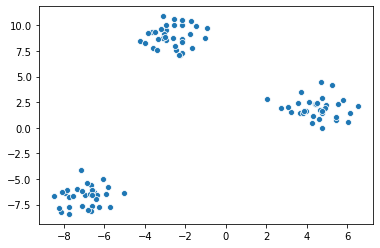

In [4]:
sns.scatterplot(X[:,0], X[:,1])

In [5]:
import random

In [30]:
class Cluster:
    
        def __init__(self, center):
            self.center = center
            self.points = []
        
        def distance(self, point):
            return np.sqrt(np.sum((point - self.center)**2))
    
    
class CustomKMeans:
    
    def __init__(self, n_clusters = 3, max_iters = 20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        
    def fit(self, X):
            
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center = random.choice(X))
            clusters.append(cluster)
         

        
        for i in range(self.max_iters):
            
            labels = []
            
            # going for each point
            for point in X:
            
                # collecting distances from every cluster
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))
                
                # finding closest cluster
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)
            
            # relocating  the cluster centers
            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis = 0)
            
            self.labels_ = labels
            self.cluster_centers_ = [cluster.center for cluster in clusters]
            
            

In [31]:
model = CustomKMeans(n_clusters=2)

model.fit(X)

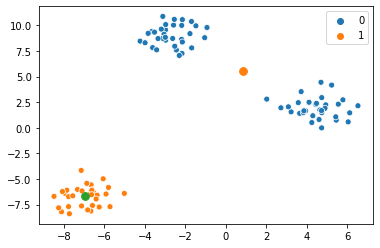

In [32]:
sns.scatterplot(X[:,0], X[:,1], hue = model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1], s = 60)